In [1]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

import torch
import cv2 as cv
import numpy as np
import tensorflow as tf
import torchvision as tv
from PIL import Image

from alzheption.clahe import Clahe
from alzheption.extractor import AlzheptionExtractor

2025-03-13 06:53:10.807231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741823590.824240   47415 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741823590.829239   47415 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 06:53:10.845803: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def custom_grayscale_threshold(img):
    img = tv.transforms.functional.rgb_to_grayscale(img)  # Convert RGB to Grayscale
    img = img.squeeze(0)  # Remove extra channel dimension (C, H, W) -> (H, W)
    img[img < 0.75] = 0  # Apply thresholding
    return img.unsqueeze(0) 

In [60]:
transform = tv.transforms.Compose([
    tv.transforms.RandomEqualize(p=1.),
    tv.transforms.ToTensor(),
    # tv.transforms.Lambda(custom_grayscale_threshold),
    # tv.transforms.Resize((299, 299)),
    tv.transforms.RandomHorizontalFlip(p=1.),  # Flip horizontal dengan probabilitas 50%
    # tv.transforms.RandomRotation(degrees=15),  # Rotasi gambar antara -15 hingga 15 derajat
    # tv.transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Translasi gambar 10% dari ukuran asli
    # tv.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Variasi warna
    # tv.transforms.RandomErasing(p=1., scale=(0.02, 0.2), ratio=(0.3, 3.3)),  # Erasing sebagian gambar untuk regularisasi
])

In [61]:
path = '../../asset/dataset_jpg_brightness_balance/'

dataset = tv.datasets.ImageFolder(path, transform=transform)

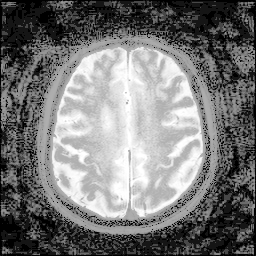

In [62]:
Image.fromarray((dataset[0][0].permute(1, 2, 0).numpy() * 255).astype(np.uint8))

In [63]:
print(dataset.class_to_idx)

{'AD': 0, 'CN': 1, 'EMCI': 2, 'LMCI': 3, 'MCI': 4, 'SMC': 5}


1


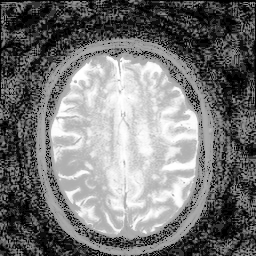

In [64]:
for img, label in dataset:
    if label == 1:
        # img[img < .75] = 0
        break
else:
    print(f"There is no data!")

print(label)
Image.fromarray((img.permute(1, 2, 0).numpy() * 255).astype(np.uint8))

0


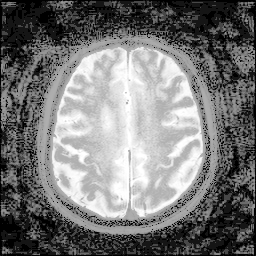

In [65]:
for img, label in dataset:
    if label == 0:
        # img[img < .75] = 0
        break
else:
    print(f"There is no data!")

print(label)
Image.fromarray((img.permute(1, 2, 0).numpy() * 255).astype(np.uint8))

2


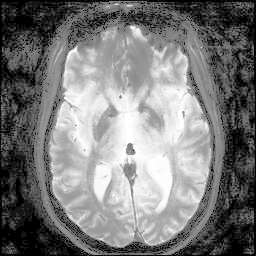

In [66]:
for img, label in dataset:
    if label == 2:
        # img[img < .75] = 0
        break
else:
    print(f"There is no data!")

print(label)
Image.fromarray((img.permute(1, 2, 0).numpy() * 255).astype(np.uint8))

3


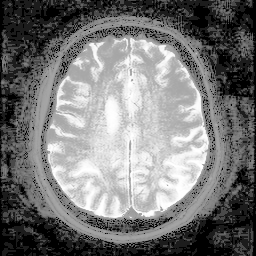

In [67]:
for img, label in dataset:
    if label == 3:
        # img[img < .75] = 0
        break
else:
    print(f"There is no data!")

print(label)
Image.fromarray((img.permute(1, 2, 0).numpy() * 255).astype(np.uint8))

4


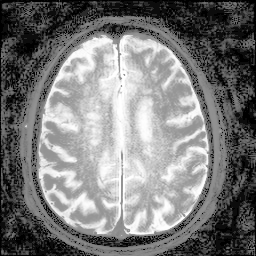

In [68]:
for img, label in dataset:
    if label == 4:
        # img[img < .75] = 0
        break
else:
    print(f"There is no data!")

print(label)
Image.fromarray((img.permute(1, 2, 0).numpy() * 255).astype(np.uint8))

5


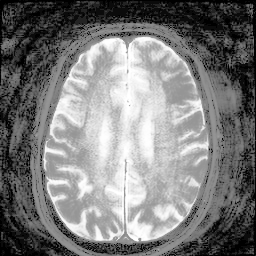

In [69]:
for img, label in dataset:
    if label == 5:
        # img[img < .75] = 0
        break
else:
    print(f"There is no data!")

print(label)
Image.fromarray((img.permute(1, 2, 0).numpy() * 255).astype(np.uint8))